In [9]:
data_dir = "data_set/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"

In [10]:
import os
class_names = sorted(os.listdir(train_dir))
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('plant.h5')

def test_model(model, image_path, class_names):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_idx]

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

    return predicted_class_name

1/1 [==============================] - 0s 349ms/step


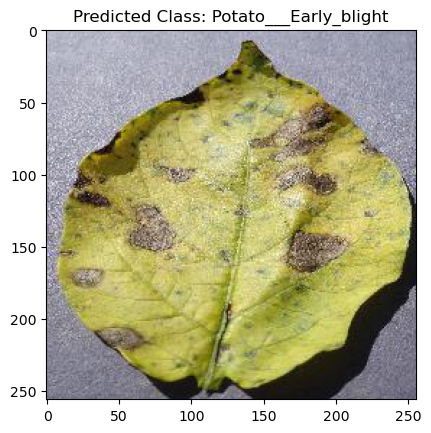

In [12]:
image_path = 'data_set/test/test/PotatoEarlyBlight4.JPG'
predicted_class = test_model(model, image_path, class_names)

1/1 [==============================] - 0s 45ms/step


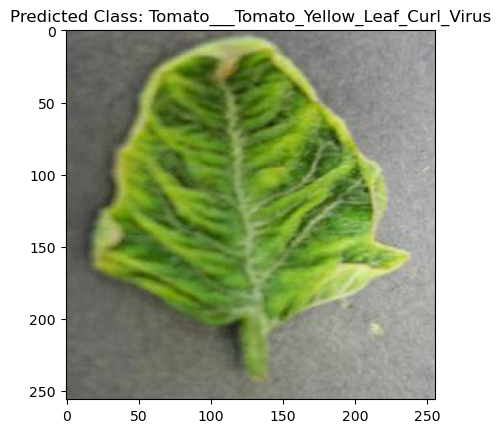

In [15]:
image_path = 'data_set/test/test/TomatoYellowCurlVirus6.JPG'
predicted_class = test_model(model, image_path, class_names)

In [17]:
import tensorflow as tf
import cv2
import os

# Load your trained model
model = tf.keras.models.load_model('plant.h5')


# Path to the directory containing your test images
test_images_dir = 'data_set/test/test'

# List all image files in the test directory
image_files = [f for f in os.listdir(test_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Define the target input size for your model
target_input_size = (256, 256)

# Loop through each image and make predictions
for image_file in image_files:
    image_path = os.path.join(test_images_dir, image_file)
    
    # Load and resize the image to the target input size
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_input_size)  # Resize to the target size
    image = image / 255.0  # Normalize the pixel values
    
    # Make a prediction using the model
    predictions = model.predict(tf.convert_to_tensor([image]))
    
    # Get the predicted class index
    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    
    # Get the predicted class label
    predicted_class_label = class_names[predicted_class_index]
    
    # Display the image name and predicted label
    print(f"Image: {image_file}, Predicted Label: {predicted_class_label}")


1/1 [==============================] - 0s 142ms/step
Image: AppleCedarRust1.JPG, Predicted Label: Apple___Cedar_apple_rust
1/1 [==============================] - 0s 47ms/step
Image: AppleCedarRust2.JPG, Predicted Label: Apple___Cedar_apple_rust
1/1 [==============================] - 0s 42ms/step
Image: AppleCedarRust3.JPG, Predicted Label: Apple___Cedar_apple_rust
1/1 [==============================] - 0s 44ms/step
Image: AppleCedarRust4.JPG, Predicted Label: Apple___Cedar_apple_rust
1/1 [==============================] - 0s 34ms/step
Image: AppleScab1.JPG, Predicted Label: Apple___Apple_scab
1/1 [==============================] - 0s 41ms/step
Image: AppleScab2.JPG, Predicted Label: Tomato___Leaf_Mold
1/1 [==============================] - 0s 39ms/step
Image: AppleScab3.JPG, Predicted Label: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
1/1 [==============================] - 0s 51ms/step
Image: CornCommonRust1.JPG, Predicted Label: Corn_(maize)___Common_rust_
1/1 [================